# Data Cleaning and Preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the dataset

In [4]:
df = pd.read_csv(r"C:\Users\ANUBHAV\Downloads\Data Set For Task-20250903T140612Z-1-001\Data Set For Task\2) Stock Prices Data Set.csv")
df

,symbol,date,open,high,low,close,volume
0,AAL,02-01-2014,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,02-01-2014,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,02-01-2014,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,02-01-2014,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,02-01-2014,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,29-12-2017,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,29-12-2017,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,29-12-2017,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,29-12-2017,51.2800,51.5500,50.8100,50.8300,1261916


## Step 2: Initial Data Exoploration

In [5]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Columns:", df.columns.tolist())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:", df.dtypes)
print("\nDataset Summary:")
print(df.info())

# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Summary of categorical columns
print("\nCategorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].value_counts())

df.columns = df.columns.str.upper()
df

Dataset Shape: (497472, 7)

Dataset Columns: ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']

Duplicate Rows: 0

Data Types: symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None

Statistical Summary:
                open           high            low          close  \
count  497461.000000  497464.000000  497464.000000  497472.000000   
mean       86.352275    

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,AAL,02-01-2014,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,02-01-2014,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,02-01-2014,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,02-01-2014,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,02-01-2014,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,29-12-2017,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,29-12-2017,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,29-12-2017,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,29-12-2017,51.2800,51.5500,50.8100,50.8300,1261916


## Step 3: Identify Missing Values

        Missing Values  Percentage
SYMBOL               0    0.000000
DATE                 0    0.000000
OPEN                11    0.002211
HIGH                 8    0.001608
LOW                  8    0.001608
CLOSE                0    0.000000
VOLUME               0    0.000000

Missing Values Analysis:
      Missing Values  Percentage
OPEN              11    0.002211
HIGH               8    0.001608
LOW                8    0.001608


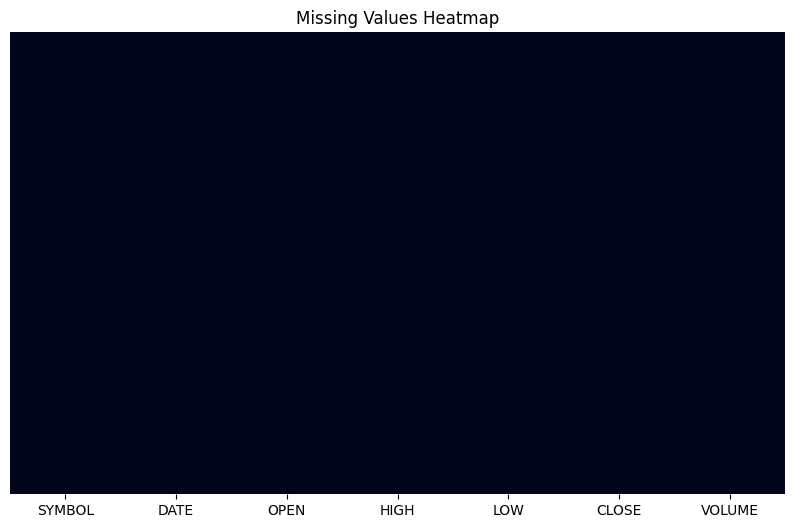

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)
print("\nMissing Values Analysis:")
print(missing_info[missing_info['Missing Values'] > 0])

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Step 4: Handle Missing Values

#### A. Numerical Data:

In [7]:
# Mean/Median Imputation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with mean for all numerical columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        print(f"Filling {col} with mean: {mean_val}")
        df[col] = df[col].fillna(mean_val)

Filling OPEN with mean: 86.35227481611624
Filling HIGH with mean: 87.13256217193607
Filling LOW with mean: 85.55246746216812


#### B. Categorical Data:

In [8]:
#Mode Imputation
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values with mode for all categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()
        print(f"Filling {col} with mode: {mode_val}")
        df[col] = df[col].fillna(mode_val)

## Step 5: Remove Duplicate Rows

In [9]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check specific columns for duplicates
df.drop_duplicates(subset=df.columns, inplace=True)

# More comprehensive duplicate analysis
print("\nDuplicate Analysis:")
print("Total rows:", len(df))
print("Unique rows:", len(df.drop_duplicates()))

Duplicate Rows: 0

Duplicate Analysis:
Total rows: 497472
Unique rows: 497472


## Step 6: Standardize Data Formats

#### A. Categorical Variables:

In [10]:
# Standardize categories (e.g., lower case, remove whitespace)
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

    # Check unique values
    print("Unique categories:", df[col].unique())

Unique categories: ['aal' 'aapl' 'aap' 'abbv' 'abc' 'abt' 'acn' 'adbe' 'adi' 'adm' 'adp'
 'adsk' 'ads' 'aee' 'aep' 'aes' 'aet' 'afl' 'agn' 'aig' 'aiv' 'aiz' 'ajg'
 'akam' 'alb' 'algn' 'alk' 'alle' 'all' 'alxn' 'amat' 'amd' 'ame' 'amgn'
 'amg' 'amp' 'amt' 'amzn' 'andv' 'anss' 'antm' 'aon' 'aos' 'apa' 'apc'
 'apd' 'aph' 'are' 'arnc' 'atvi' 'avb' 'avgo' 'avy' 'awk' 'axp' 'ayi'
 'azo' 'a' 'bac' 'bax' 'ba' 'bbt' 'bby' 'bdx' 'ben' 'bf.b' 'biib' 'bk'
 'blk' 'bll' 'bmy' 'brk.b' 'bsx' 'bwa' 'bxp' 'cag' 'cah' 'cat' 'ca' 'cbg'
 'cboe' 'cbs' 'cb' 'cci' 'ccl' 'cdns' 'celg' 'cern' 'cf' 'chd' 'chk'
 'chrw' 'chtr' 'cinf' 'ci' 'clx' 'cl' 'cma' 'cmcsa' 'cme' 'cmg' 'cmi'
 'cms' 'cnc' 'cnp' 'cof' 'cog' 'col' 'coo' 'cop' 'cost' 'coty' 'cpb' 'crm'
 'csco' 'csx' 'ctas' 'ctl' 'ctsh' 'ctxs' 'cvs' 'cvx' 'cxo' 'c' 'dal' 'de'
 'dfs' 'dgx' 'dg' 'dhi' 'dhr' 'disca' 'disck' 'dish' 'dis' 'dlr' 'dltr'
 'dov' 'dps' 'dre' 'dri' 'dte' 'duk' 'dva' 'dvn' 'd' 'ea' 'ebay' 'ecl'
 'ed' 'efx' 'eix' 'el' 'emn' 'emr' 'eog' 'eqix'

#### B. Date Formats:


In [11]:
# Convert to datetime
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y', errors='coerce')

## Step 7: Validate Changes and Final Checks

In [12]:
# Final comprehensive check
print("Final Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print("\nDuplicate Rows After Cleaning:", df.duplicated().sum())

print("\nStatistical Summary After Cleaning:")
print(df.describe())

print("\nSample Data:")
print(df.head())

# Check data types
print("\nFinal Data Types:")
print(df.dtypes)

Final Dataset Shape: (497472, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   SYMBOL  497472 non-null  object        
 1   DATE    497472 non-null  datetime64[ns]
 2   OPEN    497472 non-null  float64       
 3   HIGH    497472 non-null  float64       
 4   LOW     497472 non-null  float64       
 5   CLOSE   497472 non-null  float64       
 6   VOLUME  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB
None

Missing Values After Cleaning:
SYMBOL    0
DATE      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
dtype: int64

Duplicate Rows After Cleaning: 0

Statistical Summary After Cleaning:
                                DATE           OPEN           HIGH  \
count                         497472  497472.000000  497472.000000   
mean   201

In [13]:
df

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,aal,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,aapl,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,aap,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,abbv,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,abc,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,xyl,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,yum,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,zbh,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,zion,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [14]:
df.to_csv("cleaned_StockPrices.csv", index=False)

SYMBOL            object
DATE      datetime64[ns]
OPEN             float64
HIGH             float64
LOW              float64
CLOSE            float64
VOLUME             int64
dtype: object

In [18]:
df['SYMBOL'] = df['SYMBOL'].str.upper()

In [19]:
df

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916
